# Fraud Detection in Insurance Claims

<b>Zahra Khalafi</b>

UIN: 655096362

Zkhala3@uic.edu

Github link for this project:
https://github.com/zahrakhalafi/Project_CS_418.git

# Problem statement
<b>Problem</b>: Developing a machine learning model to detect fraudulent insurance claims. Insurance fraud can result in significant financial losses for insurance companies and policyholders, as well as higher insurance premiums for everyone. Detecting fraudulent claims can help reduce the financial impact of fraud and improve the accuracy and fairness of the insurance industry.

<b>Question to Answer</b>: Can we accurately predict which insurance claims are fraudulent using the available data on insurance claims. The machine learning model developed can be used to automatically flag potentially fraudulent claims for further investigation or denial

<b>Why did I chose this topic</b>: It is a significant and persistent issue in the insurance industry. Insurance fraud can take many forms, from exaggerated claims to deliberate accidents, and can occur in any type of insurance policy. I can also use several machine learning techniques in predicting the
fraud claims.

<b>Hypothesis 1</b>: Insurance claims with high claim amounts are more likely to be fraudulent than claims with lower claim amounts.

** Reasoning: Fraudsters may be more motivated to commit fraud if the potential payout is high, as it represents a greater financial gain for them. Additionally, high claim amounts may be more difficult to verify and investigate thoroughly, making them more vulnerable to fraudulent activity.

<b>Hypothesis 2</b>: Insurance claims on vehicle with lower deductible are more likely to be fraudulent than claims on vehicle with higher deductable amount.

** Reasoning: Insurance policies with lower deductibles have higher premiums, which means that the policyholders may be more likely to file claims in order to recoup their costs. This could potentially create an incentive for individuals to file fraudulent claims, as they may see an opportunity to receive a payout that exceeds the amount they paid in premiums.



<h3>importing the necessary libraries</h3>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# 1- Getting the Data

<h3> 1-1: Data can be accessed through this link:</h3>

https://github.com/mahmoudifard/fraud_detection

In [5]:

main_data = pd.read_csv("/Users/zarikhalafi/Documents/CS418/project/Main_data.csv")

claim_ids = pd.read_csv("/Users/zarikhalafi/Documents/CS418/project/claim_ids.csv")

# View the first few rows of the dataframe
print(main_data.shape)
print(claim_ids.shape)

(15420, 34)
(15420, 2)


<h3>1-2: Initial Exploratory data analysis</h3>

In [6]:
def perform_eda(df):
    for col in df.columns:
        print(f"Column Name: {col}")
        print(f"Data Type: {df[col].dtype}")
        print(f"Number of Unique Values: {df[col].nunique()}")
        print(f"Number of Missing Values: {df[col].isnull().sum()}")
        print(f"Sample Values: {df[col].sample(5).tolist()}")
        print("--------------------------------------------------")
perform_eda(main_data)
perform_eda(claim_ids)


Column Name: Claim_id
Data Type: int64
Number of Unique Values: 15420
Number of Missing Values: 0
Sample Values: [13327, 12895, 12444, 16866, 24025]
--------------------------------------------------
Column Name: Month
Data Type: object
Number of Unique Values: 12
Number of Missing Values: 0
Sample Values: ['Oct', 'Jan', 'Aug', 'Apr', 'Dec']
--------------------------------------------------
Column Name: WeekOfMonth
Data Type: int64
Number of Unique Values: 5
Number of Missing Values: 0
Sample Values: [1, 2, 3, 4, 4]
--------------------------------------------------
Column Name: DayOfWeek
Data Type: object
Number of Unique Values: 7
Number of Missing Values: 0
Sample Values: ['Monday', 'Monday', 'Wednesday', 'Friday', 'Wednesday']
--------------------------------------------------
Column Name: Make
Data Type: object
Number of Unique Values: 19
Number of Missing Values: 0
Sample Values: ['Saab', 'Pontiac', 'Pontiac', 'Toyota', 'Mazda']
--------------------------------------------------

<h3>1-3: Merging the data together</h3>

In [7]:
merged_data = main_data.merge(claim_ids, on='Claim_id')
y = merged_data['FraudFound_P']
merged_data = merged_data.drop(['Claim_id'],axis = 1)

merged_data.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,FraudFound_P
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,0
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,0
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,0
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,0
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,0


<h3>1-4: Looking for null values</h3>

In [8]:
for col in merged_data.columns:
    null_count = merged_data[col].isnull().sum()
    print(f"Column '{col}' has {null_count} null values.")

Column 'Month' has 0 null values.
Column 'WeekOfMonth' has 0 null values.
Column 'DayOfWeek' has 0 null values.
Column 'Make' has 0 null values.
Column 'AccidentArea' has 0 null values.
Column 'DayOfWeekClaimed' has 0 null values.
Column 'MonthClaimed' has 0 null values.
Column 'WeekOfMonthClaimed' has 0 null values.
Column 'Sex' has 0 null values.
Column 'MaritalStatus' has 0 null values.
Column 'Age' has 0 null values.
Column 'Fault' has 0 null values.
Column 'PolicyType' has 0 null values.
Column 'VehicleCategory' has 0 null values.
Column 'VehiclePrice' has 0 null values.
Column 'Unnamed: 16' has 15420 null values.
Column 'PolicyNumber' has 0 null values.
Column 'RepNumber' has 0 null values.
Column 'Deductible' has 0 null values.
Column 'DriverRating' has 0 null values.
Column 'Days_Policy_Accident' has 0 null values.
Column 'Days_Policy_Claim' has 0 null values.
Column 'PastNumberOfClaims' has 0 null values.
Column 'AgeOfVehicle' has 0 null values.
Column 'AgeOfPolicyHolder' has 

# 2: Preprocessing the data

<h3> 2-1: Finding the categorical columns</h3>

In [9]:

def determine_categorical_columns(df):
    """
    This function takes a pandas dataframe as input and determines if the data in each column is categorical or not.
    It returns a dictionary where the keys are column names and the values are True if the column is categorical, False otherwise.
    """
    categorical_cols = {}
    
    for col in df.columns:
        # Check if the column contains only non-numeric values
        if df[col].dtype == 'object' or pd.api.types.is_categorical_dtype(df[col]):
            categorical_cols[col] = True
        else:
            categorical_cols[col] = False
    
    return categorical_cols
print(determine_categorical_columns(merged_data))


{'Month': True, 'WeekOfMonth': False, 'DayOfWeek': True, 'Make': True, 'AccidentArea': True, 'DayOfWeekClaimed': True, 'MonthClaimed': True, 'WeekOfMonthClaimed': False, 'Sex': True, 'MaritalStatus': True, 'Age': False, 'Fault': True, 'PolicyType': True, 'VehicleCategory': True, 'VehiclePrice': True, 'Unnamed: 16': False, 'PolicyNumber': False, 'RepNumber': False, 'Deductible': False, 'DriverRating': False, 'Days_Policy_Accident': True, 'Days_Policy_Claim': True, 'PastNumberOfClaims': True, 'AgeOfVehicle': True, 'AgeOfPolicyHolder': True, 'PoliceReportFiled': True, 'WitnessPresent': True, 'AgentType': True, 'NumberOfSuppliments': True, 'AddressChange_Claim': True, 'NumberOfCars': True, 'Year': False, 'BasePolicy': True, 'FraudFound_P': False}


<h3> 2-2: Converting the vehicle price into ordinal numbers</h3>

In [10]:
# Define the mappings from categorical to numerical values
mappings = {'more than 69000': 6,
            '60000 to 69000': 5,
            '40000 to 59000': 4,
            '30000 to 39000': 3,
            '20000 to 29000': 2,
            'less than 20000': 1}
merged_data['VehiclePrice'] = merged_data['VehiclePrice'].replace(mappings)

<h3> 2-3: Removing the constant columns</h3> 

The constant column would not help us in any models since they do not have any variations

In [11]:
def remove_constant_cols(df):
    # Get list of columns with only one unique value
    constant_cols = [col for col in df.columns if df[col].nunique() == 1]
    
    # Drop constant columns from dataframe
    df.drop(constant_cols, axis=1, inplace=True)
    
    return df

merged_data = remove_constant_cols(merged_data)
merged_data = merged_data.drop('Unnamed: 16', axis=1)
merged_data.head()


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,FraudFound_P
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,0
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,0
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,0
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,0
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,0


<h3>2-4: Encoding the categorical columns and then scale them for furthur machine learning algorithms</h3>

In [12]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

def preprocess_data(df):
    # Find categorical columns
    categorical_cols = df.select_dtypes(include=['object']).columns
    
    # Label encode categorical columns
    le = LabelEncoder()
    for col in categorical_cols:
        df[col] = le.fit_transform(df[col])
    
    # Drop columns with zero standard deviation
    std = df.std()
    zero_std_cols = std[std == 0].index
    df = df.drop(zero_std_cols, axis=1)
     
    # Scale the data using StandardScaler
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df)
    scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
    
    return scaled_df


scaled_df = preprocess_data(merged_data)
scaled_df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,FraudFound_P
0,-1.035963,1.717545,1.500542,-0.778873,0.340019,0.790376,-0.467838,-1.345408,-2.317736,1.466229,...,-1.355359,-0.168963,-0.075326,-0.126005,0.897371,-6.403760,4.957931,-1.078658,1.231812,-0.252326
1,-0.449364,0.164199,1.500542,-0.778873,0.340019,-0.968740,-0.467838,1.037295,0.431455,1.466229,...,-0.638956,5.918449,-0.075326,-0.126005,0.897371,0.247144,-0.257739,-1.078658,-0.046421,-0.252326
2,1.310432,1.717545,-1.418572,-0.778873,0.340019,0.350597,0.998077,-0.551174,0.431455,-0.638524,...,0.793851,-0.168963,-0.075326,-0.126005,0.897371,0.247144,-0.257739,-1.078658,-0.046421,-0.252326
3,0.137234,-0.612473,-0.445534,1.303376,-2.941014,-1.408519,-0.174655,-1.345408,0.431455,-0.638524,...,1.510255,5.918449,-0.075326,-0.126005,-0.003036,0.247144,-0.257739,-1.078658,1.231812,-0.252326
4,-0.449364,1.717545,-0.932053,-0.778873,0.340019,0.790376,-0.761021,-0.551174,-2.317736,1.466229,...,-0.638956,-0.168963,-0.075326,-0.126005,0.897371,0.247144,-0.257739,-1.078658,-0.046421,-0.252326


# 3: Feature Selection


<h3>3-1: Correlation matrix</h3>

In [13]:
# Calculate the correlation matrix
corr_matrix = scaled_df.corr()

# Set a threshold for high correlation
high_corr_threshold = 0.8

# Find the highly correlated features
high_corr_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > high_corr_threshold:
            colname = corr_matrix.columns[i]
            high_corr_features.add(colname)

# Print the highly correlated features
print("Highly correlated features:", high_corr_features)

# Create a new dataframe with the features that are not highly correlated
uncorr_df = scaled_df.drop(high_corr_features, axis=1)
uncorr_df.head()

Highly correlated features: {'VehicleCategory', 'AgeOfPolicyHolder', 'Year'}


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,PastNumberOfClaims,AgeOfVehicle,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy,FraudFound_P
0,-1.035963,1.717545,1.500542,-0.778873,0.340019,0.790376,-0.467838,-1.345408,-2.317736,1.466229,...,1.360289,-3.332212,-0.168963,-0.075326,-0.126005,0.897371,-6.403760,4.957931,1.231812,-0.252326
1,-0.449364,0.164199,1.500542,-0.778873,0.340019,-0.968740,-0.467838,1.037295,0.431455,1.466229,...,1.360289,-0.701024,5.918449,-0.075326,-0.126005,0.897371,0.247144,-0.257739,-0.046421,-0.252326
2,1.310432,1.717545,-1.418572,-0.778873,0.340019,0.350597,0.998077,-0.551174,0.431455,-0.638524,...,-1.294969,0.176038,-0.168963,-0.075326,-0.126005,0.897371,0.247144,-0.257739,-0.046421,-0.252326
3,0.137234,-0.612473,-0.445534,1.303376,-2.941014,-1.408519,-0.174655,-1.345408,0.431455,-0.638524,...,-1.294969,1.053101,5.918449,-0.075326,-0.126005,-0.003036,0.247144,-0.257739,1.231812,-0.252326
4,-0.449364,1.717545,-0.932053,-0.778873,0.340019,0.790376,-0.761021,-0.551174,-2.317736,1.466229,...,1.360289,-1.578087,-0.168963,-0.075326,-0.126005,0.897371,0.247144,-0.257739,-0.046421,-0.252326



<h3>3-2: Feature Selection Analysis</h3>
performs feature selection analysis using Recursive Feature Elimination 
with cross-validation (RFECV) and returns a list of features with their importance scores

In [14]:

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

def feature_selection_analysis(df):
    # Split the data into X (features) and y (target variable)
    
    X = df.drop(['FraudFound_P'], axis=1)
    y = df['FraudFound_P']
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Fit linear regression model and obtain feature importance scores
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)
    lin_reg_scores = {col: round(score, 2) for col, score in zip(X_train.columns, lin_reg.coef_)}
    
    # Fit Lasso regression model and obtain feature importance scores
    lasso = Lasso(alpha=0.01, max_iter=10000)
    lasso.fit(X_train, y_train)
    lasso_scores = {col: round(score, 2) for col, score in zip(X_train.columns, lasso.coef_)}
    
    # Select the features using Lasso regression
    selector = SelectFromModel(lasso, prefit=True)
    selected_features = X_train.columns[selector.get_support()].tolist()
    
    # Create dictionary with selected features and their scores
    feature_scores = {}
    for col in selected_features:
        score = lin_reg_scores.get(col, 0) + lasso_scores.get(col, 0)
        feature_scores[col] = round(score, 2)
    
    # Sort features by score in descending order
    sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)
    
    return sorted_features


features_scores = feature_selection_analysis(uncorr_df)
features_scores

[('Sex', 0.03),
 ('VehiclePrice', 0.03),
 ('Days_Policy_Accident', 0.02),
 ('Deductible', 0.01),
 ('DayOfWeek', -0.01),
 ('Make', -0.01),
 ('PoliceReportFiled', -0.01),
 ('AccidentArea', -0.03),
 ('PolicyNumber', -0.03),
 ('AgeOfVehicle', -0.04),
 ('Age', -0.05),
 ('AddressChange_Claim', -0.07),
 ('Fault', -0.32),
 ('BasePolicy', -0.36)]

<h3>3-2: Creating the new dataframe based on the selected features</h3>

In [15]:
selected_features = [x[0] for x in features_scores]
selected_features.append('FraudFound_P')
new_df = uncorr_df[selected_features]
print("Now the shape of our datafram reduced to this: ",new_df.shape)
new_df.head()

Now the shape of our datafram reduced to this:  (15420, 15)


,Sex,VehiclePrice,Days_Policy_Accident,Deductible,DayOfWeek,Make,PoliceReportFiled,AccidentArea,PolicyNumber,AgeOfVehicle,Age,AddressChange_Claim,Fault,BasePolicy,FraudFound_P
0,-2.317736,2.220344,0.054323,-2.450633,1.500542,-0.778873,-0.168963,0.340019,-1.731938,-3.332212,-1.397554,-6.403760,-0.610825,1.231812,-0.252326
1,0.431455,2.220344,0.054323,-0.175298,1.500542,-0.778873,5.918449,0.340019,-1.731714,-0.701024,-0.434015,0.247144,-0.610825,-0.046421,-0.252326
2,0.431455,2.220344,0.054323,-0.175298,-1.418572,-0.778873,-0.168963,0.340019,-1.731489,0.176038,0.529523,0.247144,-0.610825,-0.046421,-0.252326
3,0.431455,-0.551715,0.054323,-0.175298,-0.445534,1.303376,5.918449,-2.941014,-1.731265,1.053101,1.863653,0.247144,1.637129,1.231812,-0.252326
4,-2.317736,2.220344,0.054323,-0.175298,-0.932053,-0.778873,-0.168963,0.340019,-1.731040,-1.578087,-0.952844,0.247144,1.637129,-0.046421,-0.252326


<h4>Vizulizing the data</h4>

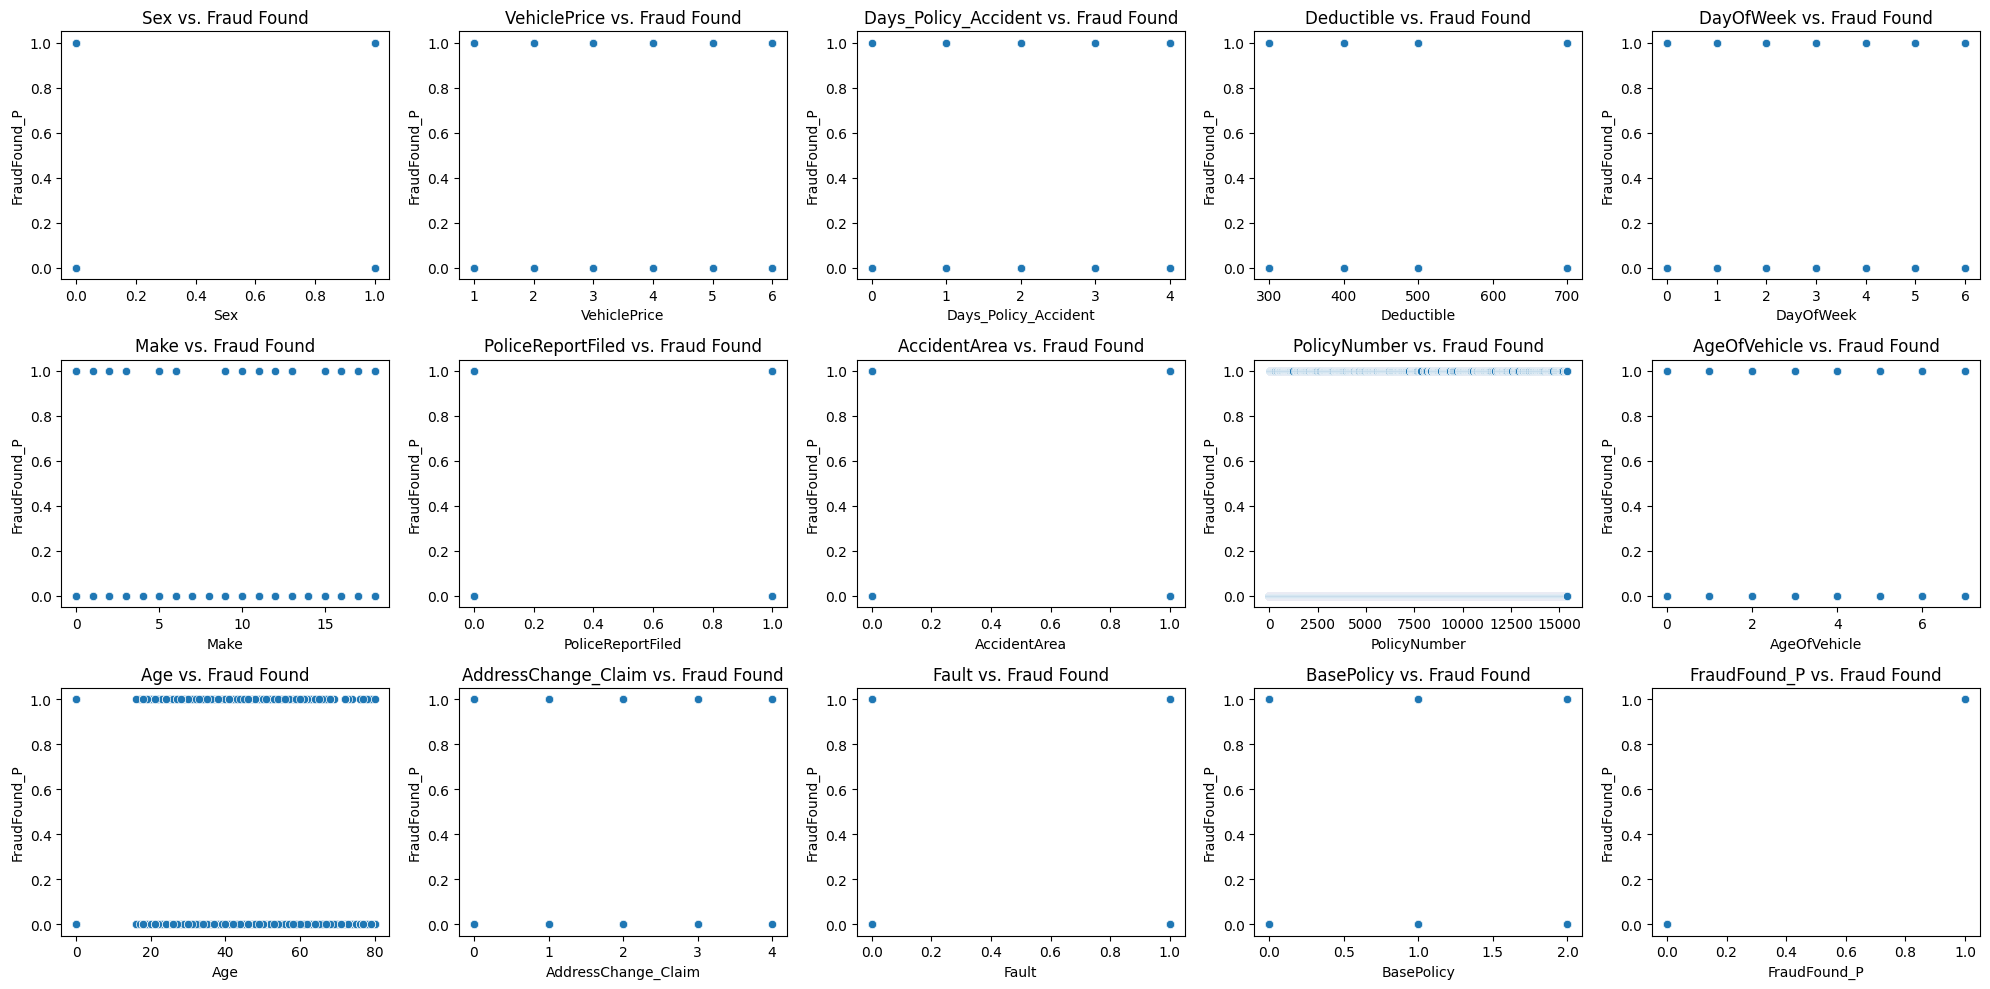

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming uncorr_df is your dataframe

# Set up a 3 x 5 grid of subplots
fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(20, 10))


# Iterate through each feature and create a chart
for i, feature in enumerate(selected_features):
    row = i // 5  # Get the row number
    col = i % 5  # Get the column number
    
    # Create the chart
    sns.scatterplot(x=feature, y=y, data=merged_data, ax=axs[row, col])
    axs[row, col].set_title(f'{feature} vs. Fraud Found')
    
# Adjust the spacing between subplots
plt.tight_layout()

# Show the charts
plt.show()


# 4: Hypothesis testing (Machine learning) and Statistical inference

<h3>4-1: Spliting the data and create the test and train data frames</h3>


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.feature_selection import f_regression

# Separate the independent and dependent variables
X = new_df.drop(['FraudFound_P'], axis=1)
y = y

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h3>4-2: Running a Logistic Regression</h3>

Running a Regression model to predict the percentage of a transaction to be fraud or not. 
calculating different scores for the performance of the model

In [18]:
# Import the logistic regression model and the necessary metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Fit the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)

# Get the confusion matrix and classification report of the model
log_reg_cm = confusion_matrix(y_test, log_reg_pred)
log_reg_cr = classification_report(y_test, log_reg_pred, zero_division=1)

# Print the results
print('Logistic Regression:')
print('Confusion Matrix:\n', log_reg_cm)
print('Classification Report:\n', log_reg_cr)


Logistic Regression:
Confusion Matrix:
 [[2887    0]
 [ 197    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      2887
           1       1.00      0.00      0.00       197

    accuracy                           0.94      3084
   macro avg       0.97      0.50      0.48      3084
weighted avg       0.94      0.94      0.91      3084



<h3>4-3: Running a Decision Tree</h3>

Running a Decision Tree model to predict the percentage of a transaction to be fraud or not. 
calculating different scores for the performance of the model

In [19]:
# Fit the decision tree model
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)

# Get the MSE and R2 score of the model
tree_mse = mean_squared_error(y_test, tree_pred)
tree_r2 = r2_score(y_test, tree_pred)

# Perform the hypothesis tests
X_train_t = sm.add_constant(X_train)
sm_tree = sm.OLS(y_train, X_train_t).fit()
p_values = sm_tree.pvalues
f_statistic, p_value = f_regression(X_train_t, y_train)

# Print the results
print('Decision Tree:')
print('MSE: {:.2f}'.format(tree_mse))
print('R2 score: {:.2f}'.format(tree_r2))
print('P-values:', p_values.round(2))
print('F-statistic: {:.2f}'.format(f_statistic[0]))
print('P-value: {:.2f}'.format(p_value[0]))


Decision Tree:
MSE: 0.11
R2 score: -0.84
P-values: const                   0.00
Sex                     0.04
VehiclePrice            0.07
Days_Policy_Accident    0.17
Deductible              0.15
DayOfWeek               0.11
Make                    0.15
PoliceReportFiled       0.09
AccidentArea            0.01
PolicyNumber            0.06
AgeOfVehicle            0.01
Age                     0.01
AddressChange_Claim     0.00
Fault                   0.00
BasePolicy              0.00
dtype: float64
F-statistic: 0.00
P-value: 1.00


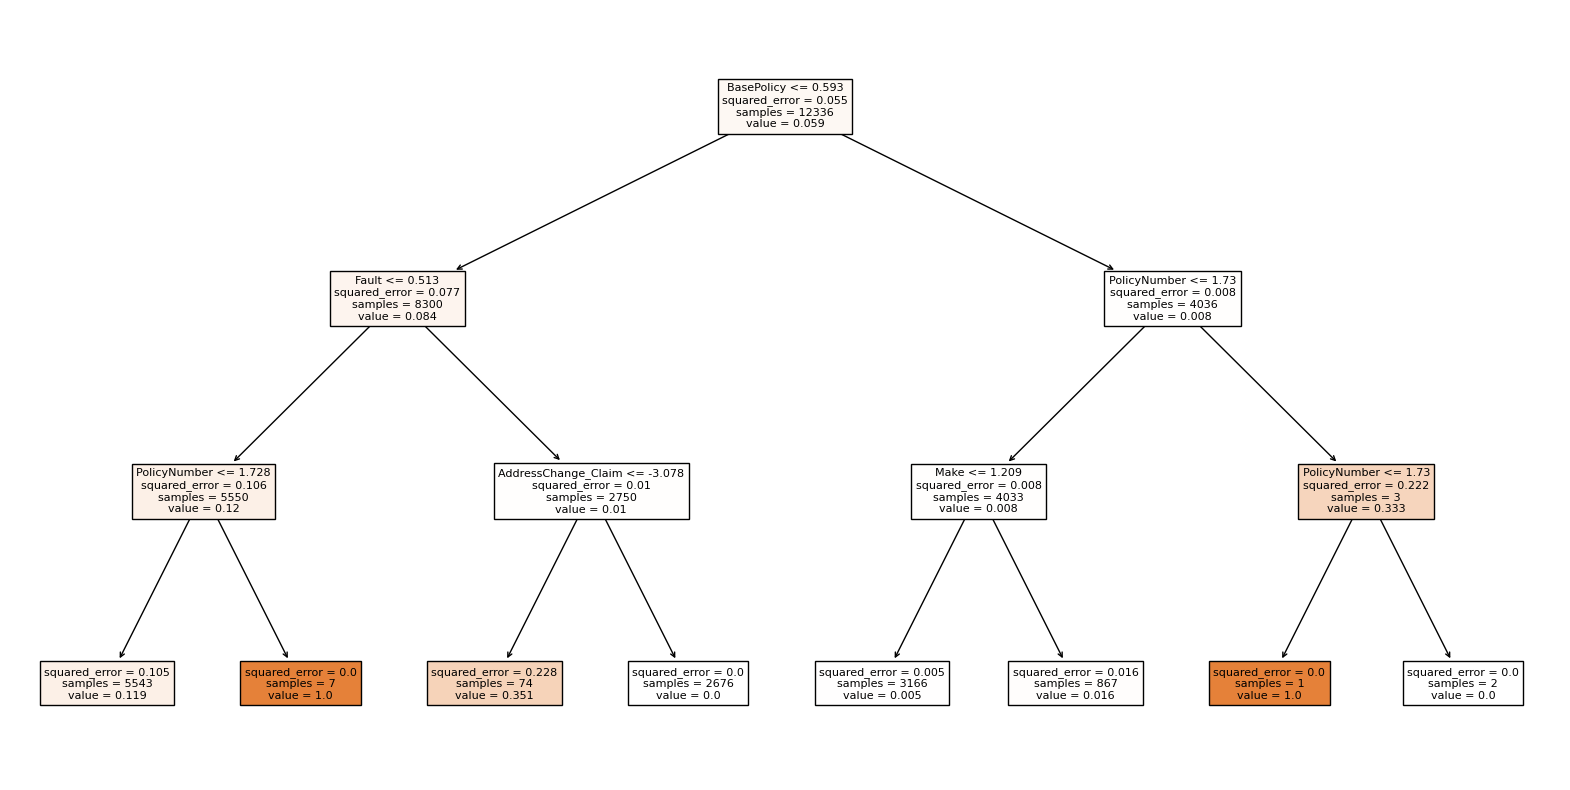

In [20]:
from sklearn.tree import plot_tree

# Fit the decision tree model
tree = DecisionTreeRegressor(random_state=42, max_depth = 3)
tree.fit(X_train, y_train)

# Visualize the tree
plt.figure(figsize=(20,10))
plot_tree(tree, feature_names=X_train.columns, filled=True)
plt.show()


<h3>4-4: Running a Random Forest Model</h3>

Running a Random Forest model to predict the percentage of a transaction to be fraud or not. 
calculating different scores for the performance of the model

In [21]:
from sklearn.inspection import permutation_importance

# Fit the random forest model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# Get the MSE and R2 score of the model
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

# Perform permutation importance
perm_importance = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)

# Perform the hypothesis tests
X_train_t = sm.add_constant(X_train)
sm_rf = sm.OLS(y_train, X_train_t).fit()
p_values = sm_rf.pvalues
f_statistic, p_value = f_regression(X_train_t, y_train)

# Print the results
print('Random Forest:')
print('MSE: {:.2f}'.format(rf_mse))
print('R2 score: {:.2f}'.format(rf_r2))
print('Permutation importance:', perm_importance.importances_mean.round(2))
print('P-values:', p_values.round(2))
print('F-statistic: {:.2f}'.format(f_statistic[0]))
print('P-value: {:.2f}'.format(p_value[0]))


Random Forest:
MSE: 0.06
R2 score: 0.05
Permutation importance: [ 0.    0.01  0.    0.01 -0.01 -0.   -0.    0.    0.01  0.02  0.06  0.05
  0.16  0.15]
P-values: const                   0.00
Sex                     0.04
VehiclePrice            0.07
Days_Policy_Accident    0.17
Deductible              0.15
DayOfWeek               0.11
Make                    0.15
PoliceReportFiled       0.09
AccidentArea            0.01
PolicyNumber            0.06
AgeOfVehicle            0.01
Age                     0.01
AddressChange_Claim     0.00
Fault                   0.00
BasePolicy              0.00
dtype: float64
F-statistic: 0.00
P-value: 1.00


Random Forest:
MSE: 0.06
R2 score: 0.05
P-values: const                   0.00
Sex                     0.04
VehiclePrice            0.07
Days_Policy_Accident    0.17
Deductible              0.15
DayOfWeek               0.11
Make                    0.15
PoliceReportFiled       0.09
AccidentArea            0.01
PolicyNumber            0.06
AgeOfVehicle            0.01
Age                     0.01
AddressChange_Claim     0.00
Fault                   0.00
BasePolicy              0.00
dtype: float64
F-statistic: 0.00
P-value: 1.00


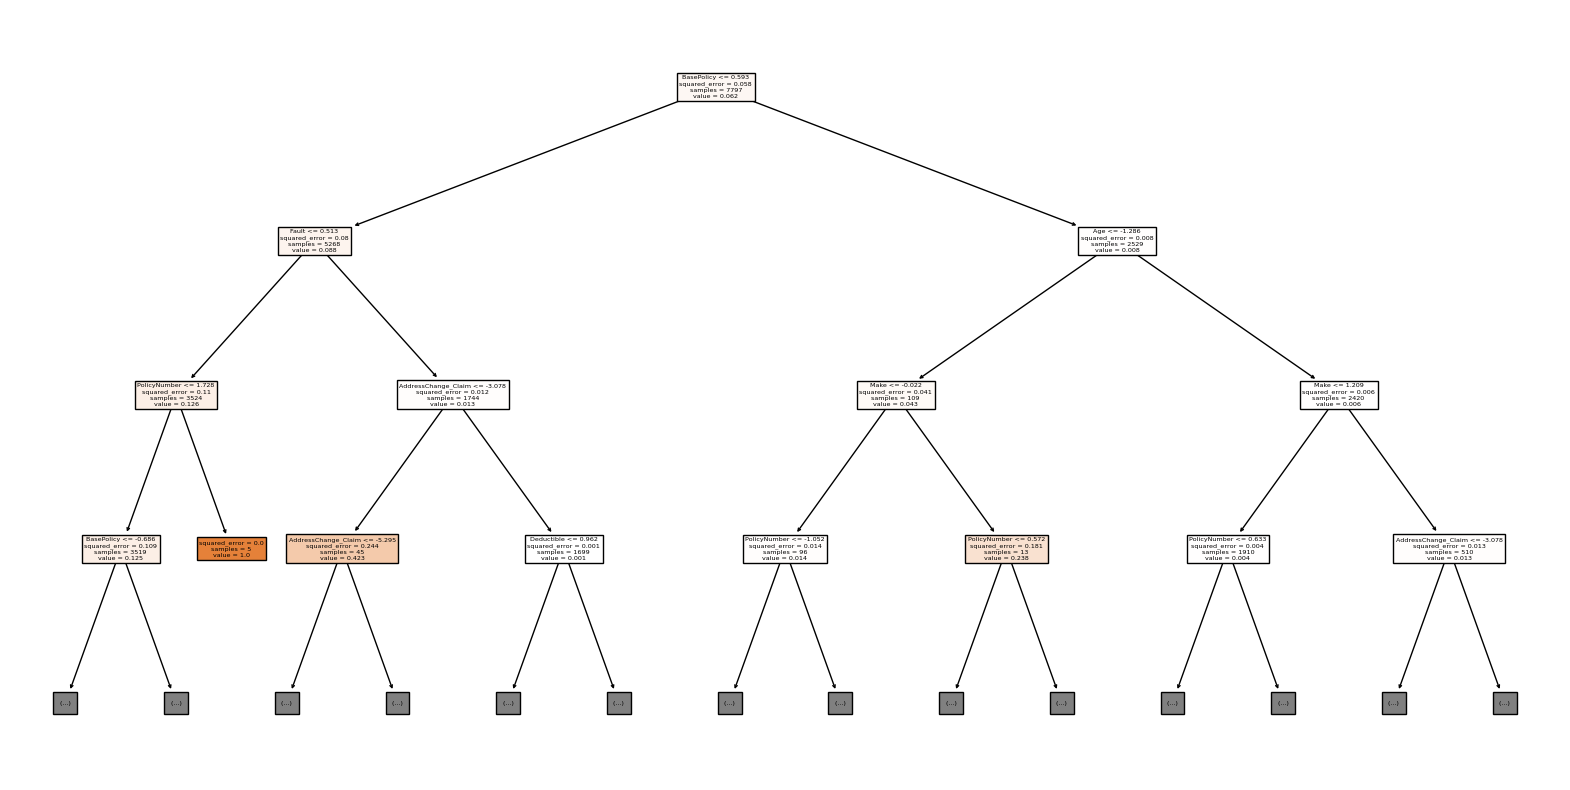

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree

# Fit the random forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get the MSE and R2 score of the model
rf_mse = mean_squared_error(y_test, rf.predict(X_test))
rf_r2 = r2_score(y_test, rf.predict(X_test))

# Plot the decision tree
fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(rf.estimators_[0], max_depth=3, feature_names=X_train.columns, ax=ax, filled=True);

# Print the results
print('Random Forest:')
print('MSE: {:.2f}'.format(rf_mse))
print('R2 score: {:.2f}'.format(rf_r2))
print('P-values:', p_values.round(2))
print('F-statistic: {:.2f}'.format(f_statistic[0]))
print('P-value: {:.2f}'.format(p_value[0]))



<h3>4-5: Running a Neural Network Model</h3>

Running a Neural Network model to predict the percentage of a transaction to be fraud or not. 
calculating different scores for the performance of the model

In [23]:
# Fit the neural network model
nn = MLPRegressor(random_state=42, max_iter=1000)
nn.fit(X_train, y_train)
nn_pred = nn.predict(X_test)

# Get the MSE and R2 score of the model
nn_mse = mean_squared_error(y_test, nn_pred)
nn_r2 = r2_score(y_test, nn_pred)

# Perform the hypothesis test
f_statistic, p_value = f_regression(X_train, y_train)

# Print the results for each feature


# Print the overall results
print('Neural Network:')
print('MSE: {:.2f}'.format(nn_mse))
print('R2 score: {:.2f}'.format(nn_r2))


Neural Network:
MSE: 0.06
R2 score: 0.06


# 5: Hypothesis testing


<h3>Hypothesis 1: Insurance claims on vehicle with higher values are more likely to be fraudulent than claims on vehicle with lower values.</h3>

In [25]:
import numpy as np
import scipy.stats as stats

# Assuming uncorr_df is your dataframe

# Divide the data into two groups: high claim amounts and low claim amounts
high_claims = uncorr_df[uncorr_df['VehiclePrice'] > uncorr_df['VehiclePrice'].median()]
low_claims = uncorr_df[uncorr_df['VehiclePrice'] <= uncorr_df['VehiclePrice'].median()]

# Calculate the proportion of fraudulent claims in each group
high_fraud_prop = np.mean(high_claims['FraudFound_P'])
low_fraud_prop = np.mean(low_claims['FraudFound_P'])

# Calculate the difference in proportions
diff_prop = high_fraud_prop - low_fraud_prop

# Calculate the standard error of the difference in proportions
se_prop_diff = np.sqrt((high_fraud_prop * (1 - high_fraud_prop)) / len(high_claims) + (low_fraud_prop * (1 - low_fraud_prop)) / len(low_claims))

# Calculate the z-statistic
z = diff_prop / se_prop_diff

# Calculate the p-value
p_value = stats.norm.sf(abs(z)) * 2

# Print the results
print(f'Proportion of fraudulent claims in vehicles with high price group: {high_fraud_prop:.2f}')
print(f'Proportion of fraudulent claims in vehicles with low price group: {low_fraud_prop:.2f}')
print(f'Difference in proportions: {diff_prop:.2f}')
print(f'Z-statistic: {z:.2f}')
print(f'P-value: {p_value:.4f}')


Proportion of fraudulent claims in vehicles with high price group: 0.02
Proportion of fraudulent claims in vehicles with low price group: -0.01
Difference in proportions: 0.03
Z-statistic: 24.15
P-value: 0.0000


<h3>Hypothesis 2: Insurance claims on vehicle with higher deductible are more likely to be fraudulent than claims on vehicle with lower deductible amount.</h3>

<h4>Based on the statistical analysis, the variable Deductible seems to be not statistically significant, according to the statistical analysis of the variables in the decision trees and random forest tree it seems that the pvalue for deductible is 0.26 which indicates it is less than 90% confidence intervals. In another word we can not reject not accept the null hypothesis based on the data. </h4>